In [1]:
# EDA Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data Set
df = pd.read_csv("thoracicdata.csv")

In [3]:
# Descriptive Statistics
df.head()

,Diagnosis,FEV,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,TNM,DM,MI,PAD,Smoking,Asthma,AGE,Risk1Y
DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [4]:
df.tail()

,Diagnosis,FEV,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,TNM,DM,MI,PAD,Smoking,Asthma,AGE,Risk1Y
DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


In [5]:
df.columns

Index(['Diagnosis', 'FEV', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea',
       'Cough', 'Weakness', 'TNM', 'DM', 'MI', 'PAD', 'Smoking', 'Asthma',
       'AGE', 'Risk1Y'],
      dtype='object')

In [8]:
print(df.columns.str.upper())

Index(['DIAGNOSIS', 'FEV', 'PERFORMANCE', 'PAIN', 'HAEMOPTYSIS', 'DYSPNOEA',
       'COUGH', 'WEAKNESS', 'TNM', 'DM', 'MI', 'PAD', 'SMOKING', 'ASTHMA',
       'AGE', 'RISK1Y'],
      dtype='object')


In [9]:
df.shape

(470, 16)

In [10]:
df.describe()

,Diagnosis,FEV,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


In [11]:
df.dtypes

Diagnosis      float64
FEV            float64
Performance     object
Pain            object
Haemoptysis     object
Dyspnoea        object
Cough           object
Weakness        object
TNM             object
DM              object
MI              object
PAD             object
Smoking         object
Asthma          object
AGE              int64
Risk1Y          object
dtype: object

In [12]:
# Correlation Between Attributes using Pearson Correlation
df.corr(method='pearson')
# The correlation is Using only the float(numeric instead of all) hence we need to convert all to numeric not objects

,Diagnosis,FEV,AGE
Diagnosis,1.000000,0.032975,-0.290178
FEV,0.032975,1.000000,-0.115900
AGE,-0.290178,-0.115900,1.000000


In [13]:
# Convert F to 0 and T to 1
x_ex = np.array(['T','F','T','F'])

In [27]:
for i in x_ex:
    if i == 'T':
        print(1)
    else:
        print(0)
    
    
   
        

1
0
1
0


In [28]:
#One Hot Encoding Using get_dummies
df1 = df

In [38]:
# Replace T,F with 1,0
df1.replace({
    'T':1,
    'F':0,
    'PRZ0':0,
    'PRZ1':1,
    'PRZ2':2,
    'OC10':0,
    'OC11':1,
    'OC12':2,
    'OC13':3,
    'OC14':4,
    'OC15':5
},inplace=True)

In [39]:
# Let us check our correlation
df1.head()

,Diagnosis,FEV,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,TNM,DM,MI,PAD,Smoking,Asthma,AGE,Risk1Y
DGN2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
DGN3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
DGN3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
DGN3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
DGN3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [40]:
# Our data structures are now numerical
df1.dtypes

Diagnosis      float64
FEV            float64
Performance      int64
Pain             int64
Haemoptysis      int64
Dyspnoea         int64
Cough            int64
Weakness         int64
TNM              int64
DM               int64
MI               int64
PAD              int64
Smoking          int64
Asthma           int64
AGE              int64
Risk1Y           int64
dtype: object

In [41]:
df1.corr()

,Diagnosis,FEV,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,TNM,DM,MI,PAD,Smoking,Asthma,AGE,Risk1Y
Diagnosis,1.000000,0.032975,-0.091094,0.019786,-0.095827,0.055829,-0.052770,-0.100242,0.034088,-0.115145,-0.009135,-0.035584,-0.012009,-0.060578,-0.290178,-0.046374
FEV,0.032975,1.000000,-0.143155,0.161615,0.102979,0.260073,-0.099914,-0.086103,0.015504,-0.022251,-0.013617,-0.025088,-0.100853,-0.016509,-0.115900,-0.042841
Performance,-0.091094,-0.143155,1.000000,0.092863,0.123296,0.092863,0.684647,0.418042,0.089751,0.025310,0.026788,0.023166,0.172289,-0.034330,0.214528,0.093200
Pain,0.019786,0.161615,0.092863,1.000000,0.256225,0.067529,-0.024115,-0.072455,0.099942,0.022578,-0.017372,-0.034968,-0.077406,-0.017372,0.044789,0.057375
Haemoptysis,-0.095827,0.102979,0.123296,0.256225,1.000000,0.134386,0.081772,0.060393,0.059840,-0.001471,-0.026886,0.086156,-0.044942,-0.026886,0.086705,0.065785
Dyspnoea,0.055829,0.260073,0.092863,0.067529,0.134386,1.000000,0.049843,-0.072455,0.075502,-0.042725,-0.017372,0.097572,-0.077406,-0.017372,-0.015331,0.105530
Cough,-0.052770,-0.099914,0.684647,-0.024115,0.081772,0.049843,1.000000,0.202245,0.145345,0.016551,0.044101,0.017815,0.200373,-0.026401,0.149589,0.088860
Weakness,-0.100242,-0.086103,0.418042,-0.072455,0.060393,-0.072455,0.202245,1.000000,-0.036044,0.069522,0.058695,0.029726,0.118527,-0.029161,0.208003,0.086467
TNM,0.034088,0.015504,0.089751,0.099942,0.059840,0.075502,0.145345,-0.036044,1.000000,0.037363,-0.022009,-0.020854,0.038303,-0.022009,0.016118,0.174371
DM,-0.115145,-0.022251,0.025310,0.022578,-0.001471,-0.042725,0.016551,0.069522,0.037363,1.000000,-0.018543,0.025328,-0.036906,-0.018543,0.085081,0.108974


In [49]:
%matplotlib inline

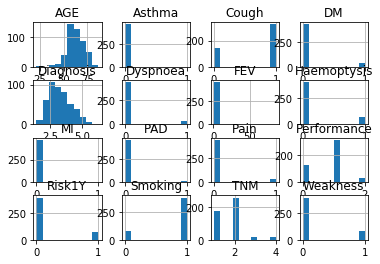

In [50]:
# Histogram
df1.hist()
plt.show()


In [103]:
from sklearn.linear_model import LogisticRegression
modelLogit = LogisticRegression()
skb = SelectKBest(score_func=chi2,k=4)
skbfit = skb.fit(Xfeatures,Ylabel)

In [104]:
skbfit.scores_
best_features = skbfit.transform(Xfeatures)

In [127]:
#using our LogisticRegression
modelLogit.fit(X_train, Y_train)
result = modelLogit.score(X_test, Y_test)
print("Accuracy: ",result*100.0)

Accuracy:  83.9743589744


In [128]:
# Hence we our model is ok 83.9 %

In [137]:
# Using our LogisticRegression
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(modelLogit, Xfeatures, Ylabel, cv=kfold)
print(results)
print("Mean Accuracy:", results.mean()*100.0)
print("STD Accuracy:", results.std()*100.0)

[ 0.78723404  0.85106383  0.85106383  0.85106383  0.80851064  0.82978723
  0.85106383  0.82978723  0.87234043  0.93617021]
Mean Accuracy: 84.6808510638
STD Accuracy: 3.78221039035
